In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [2]:
data_dir = 'DATA'

In [3]:
image_class=["COVID","NORMAL"]

In [4]:
image_exts=['jpeg', 'jpg', 'bmp', 'png']

In [5]:
for image_class in os.listdir(data_dir):
    class_dir = os.path.join(data_dir, image_class)

    # Iterate through images in the class directory
    for image in os.listdir(class_dir):
        image_path = os.path.join(class_dir, image)
        # Read the image
        img = cv2.imread(image_path)
        #plt.imshow(img)
        #plt.show()

        
            
           

In [6]:
import tensorflow as tf

In [7]:

data = tf.keras.utils.image_dataset_from_directory('DATA')
data.class_names

Found 324 files belonging to 2 classes.


['COVID', 'NORMAL']

In [8]:
model = tf.keras.Sequential([
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Dropout(),
    
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Dropout(2),
    
    tf.keras.layers.Conv2D(16, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D(),
    #tf.keras.layers.Dropout(1),
    tf.keras.layers.Flatten(),
    
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Print the model summary
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

In [9]:
train_size = int(0.7 * len(data))
val_size = int(0.2 * len(data))
test_size = len(data) - train_size - val_size

# Define data for train , test and validation
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size + val_size).take(test_size)

In [14]:
history=model.fit(train,batch_size=20,epochs=10,validation_data=val)

Epoch 1/10
7/7 [==============================] - 18s 2s/step - loss: 137.2622 - accuracy: 0.4955 - val_loss: 18.1738 - val_accuracy: 0.5000
Epoch 2/10
7/7 [==============================] - 14s 2s/step - loss: 7.2312 - accuracy: 0.5491 - val_loss: 0.5567 - val_accuracy: 0.7812
Epoch 3/10
7/7 [==============================] - 14s 2s/step - loss: 0.4794 - accuracy: 0.8259 - val_loss: 0.4888 - val_accuracy: 0.8125
Epoch 4/10
7/7 [==============================] - 14s 2s/step - loss: 0.3615 - accuracy: 0.8661 - val_loss: 0.3422 - val_accuracy: 0.8594
Epoch 5/10
7/7 [==============================] - 16s 2s/step - loss: 0.2533 - accuracy: 0.9241 - val_loss: 0.2870 - val_accuracy: 0.9062
Epoch 6/10
7/7 [==============================] - 15s 2s/step - loss: 0.2617 - accuracy: 0.9464 - val_loss: 0.4105 - val_accuracy: 0.8906
Epoch 7/10
7/7 [==============================] - 14s 2s/step - loss: 0.2417 - accuracy: 0.9509 - val_loss: 0.1643 - val_accuracy: 0.9844
Epoch 8/10
7/7 [===============

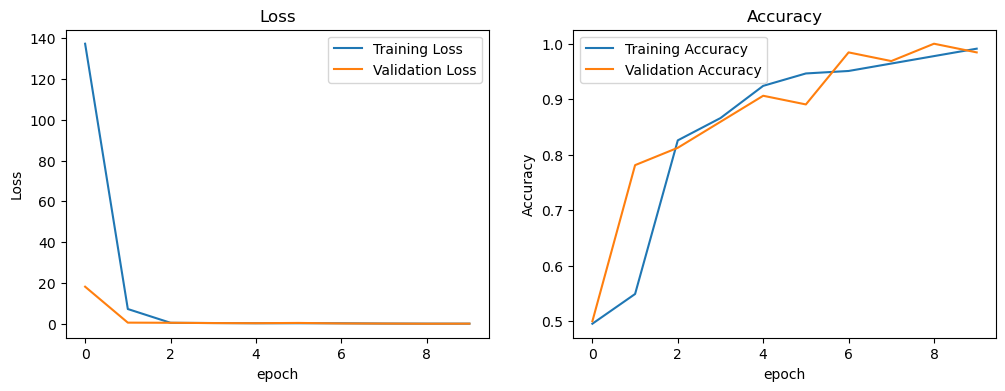

In [31]:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.xlabel("epoch")
plt.ylabel("Loss")
plt.legend()
plt.title('Loss')

plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel("epoch")
plt.ylabel("Accuracy")
plt.legend()
plt.title('Accuracy')

plt.show()

In [17]:
test_loss, test_accuracy = model.evaluate(test)
print(f'Test Accuracy: {test_accuracy}')
print(f'Test Loss: {test_loss}')

2/2 [==============================] - 2s 197ms/step - loss: 0.0122 - accuracy: 1.0000
Test Accuracy: 1.0
Test Loss: 0.01215272769331932


In [19]:
class_names = data.class_names

1/1 [==============================] - 0s 57ms/step
[[0.508645]]
NORMAL


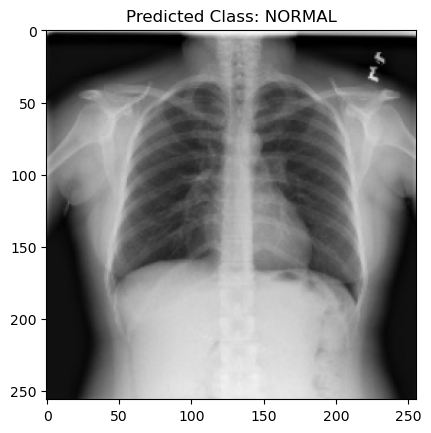

In [20]:
test_image = cv2.imread('normal_11.jpg')
resized_image = cv2.resize(test_image, (256, 256))

# Preprocess the test image and make predictions
test_image = tf.image.convert_image_dtype(resized_image, tf.float32)
test_image = tf.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
print(predictions)
# Determine the class based on the prediction
class_index = int(predictions[0, 0] > 0.5)
predicted_class = class_names[class_index]
print(predicted_class)
# Display the test image and prediction
plt.imshow(cv2.cvtColor(test_image[0].numpy(), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class}')
plt.show()


1/1 [==============================] - 0s 58ms/step
[[0.50198984]]
NORMAL


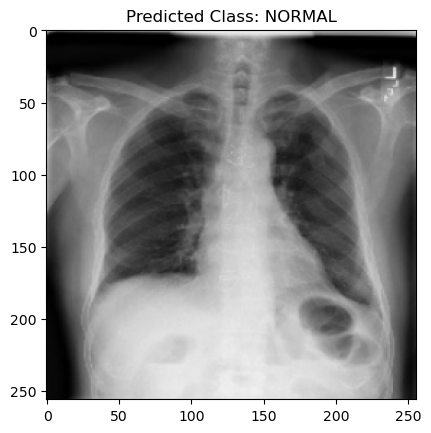

In [23]:
test_image = cv2.imread('normal_25.jpg')
resized_image = cv2.resize(test_image, (256, 256))

# Preprocess the test image and make predictions
test_image = tf.image.convert_image_dtype(resized_image, tf.float32)
test_image = tf.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
print(predictions)
# Determine the class based on the prediction
class_index = int(predictions[0, 0] > 0.5)
predicted_class = class_names[class_index]
print(predicted_class)
# Display the test image and prediction
plt.imshow(cv2.cvtColor(test_image[0].numpy(), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

1/1 [==============================] - 0s 56ms/step
[[0.48906592]]
COVID


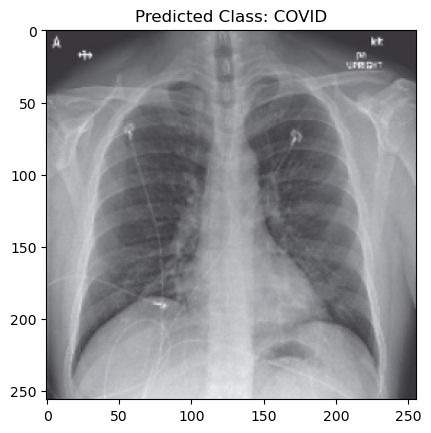

In [21]:
test_image = cv2.imread('covid_38.jpg')
resized_image = cv2.resize(test_image, (256, 256))

# Preprocess the test image and make predictions
test_image = tf.image.convert_image_dtype(resized_image, tf.float32)
test_image = tf.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
print(predictions)
# Determine the class based on the prediction
class_index = int(predictions[0, 0] > 0.5)
predicted_class = class_names[class_index]
print(predicted_class)
# Display the test image and prediction
plt.imshow(cv2.cvtColor(test_image[0].numpy(), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class}')
plt.show()

1/1 [==============================] - 0s 59ms/step
[[0.48712116]]
COVID


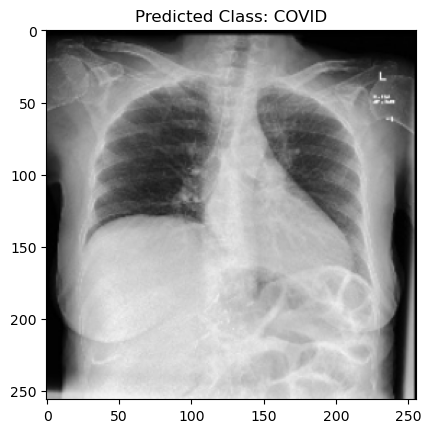

In [22]:
test_image = cv2.imread('covid_13.jpg')
resized_image = cv2.resize(test_image, (256, 256))

# Preprocess the test image and make predictions
test_image = tf.image.convert_image_dtype(resized_image, tf.float32)
test_image = tf.expand_dims(test_image, axis=0)
predictions = model.predict(test_image)
print(predictions)
# Determine the class based on the prediction
class_index = int(predictions[0, 0] > 0.5)
predicted_class = class_names[class_index]
print(predicted_class)
# Display the test image and prediction
plt.imshow(cv2.cvtColor(test_image[0].numpy(), cv2.COLOR_BGR2RGB))
plt.title(f'Predicted Class: {predicted_class}')
plt.show()